In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np

/Users/liqingyang/opt/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [11]:
## Get the ../btc_1h_2015_10_08.csv data

bitcoin_1h = pd.read_csv('/Users/liqingyang/Documents/GitHub/head_shoulder_bots/data/btc_1h_2015_10_08.csv', 
                         parse_dates=['date'],
                         index_col=['date'],
                         header=1
                        )
bitcoin_1h

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2023-03-11 23:00:00,1678575600000,BTC/USD,20655.30,21249.00,20655.30,21051.13,40.770876,8.582730e+05
2023-03-11 22:00:00,1678572000000,BTC/USD,21097.99,21459.99,20556.70,20655.30,84.363120,1.742546e+06
2023-03-11 21:00:00,1678568400000,BTC/USD,20982.19,21110.83,20880.14,21097.99,9.301693,1.962470e+05
2023-03-11 20:00:00,1678564800000,BTC/USD,20644.43,21173.29,20644.43,20982.19,45.597754,9.567407e+05
2023-03-11 19:00:00,1678561200000,BTC/USD,20962.31,20962.31,20644.43,20644.43,22.135508,4.569749e+05
...,...,...,...,...,...,...,...,...
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02


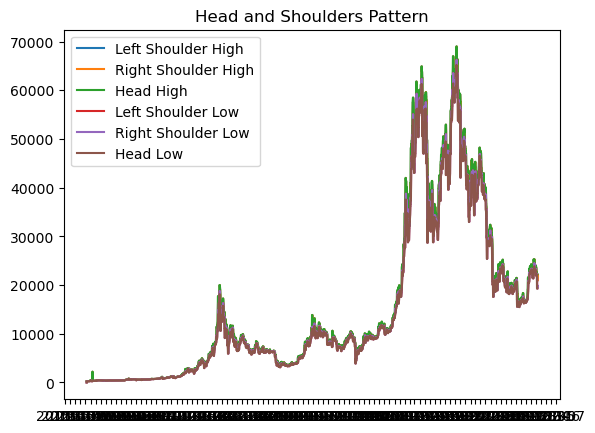

In [14]:

# Load data into Pandas DataFrame
df = bitcoin_1h.copy()

# Define the length of the left and right shoulders, and the head
left_shoulder = 30
right_shoulder = 30
head = 60

# Define the indicators for the pattern
left_shoulder_high = df['high'].rolling(window=left_shoulder).max()
right_shoulder_high = df['high'].rolling(window=right_shoulder).max()
head_high = df['high'].rolling(window=head).max()

left_shoulder_low = df['low'].rolling(window=left_shoulder).min()
right_shoulder_low = df['low'].rolling(window=right_shoulder).min()
head_low = df['low'].rolling(window=head).min()

# Define the condition for a head and shoulders pattern
head_shoulders = np.where(
    (df['close'] > left_shoulder_high.shift(1)) &
    (df['close'] > right_shoulder_high.shift(1)) &
    (df['close'] > head_high.shift(1)) &
    (df['close'].shift(-left_shoulder) < left_shoulder_low.shift(-left_shoulder)) &
    (df['close'].shift(-right_shoulder) < right_shoulder_low.shift(-right_shoulder)) &
    (df['close'].shift(-head) < head_low.shift(-head))
    , 1, 0)

# Plot the head and shoulders pattern
fig, ax = plt.subplots()
# candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red')
ax.set_title('Head and Shoulders Pattern')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.plot(df.index, left_shoulder_high, label='Left Shoulder High')
ax.plot(df.index, right_shoulder_high, label='Right Shoulder High')
ax.plot(df.index, head_high, label='Head High')
ax.plot(df.index, left_shoulder_low, label='Left Shoulder Low')
ax.plot(df.index, right_shoulder_low, label='Right Shoulder Low')
ax.plot(df.index, head_low, label='Head Low')
ax.legend()
plt.show()
